In [1]:
# Keras imports
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Input

# Other imports
from sklearn.linear_model import LogisticRegression
from IPython.display import Image, display
import numpy as np
import os
import json
import pickle

Using TensorFlow backend.


In [2]:
config={
  "model"           : "vgg16",
  "weights"         : "imagenet",

  "classifier_path" : "car_damage_check/severity/classifier.pickle",

}

In [3]:
# load the trained logistic regression classifier
print ("[INFO] Loading the classifier...")
classifier = pickle.load(open(config["classifier_path"], 'rb'))

# pretrained models needed to perform feature extraction on test data too!
if config["model"] == "vgg16":
    base_model = VGG16(weights=config["weights"])
    model = Model(input=base_model.input, output=base_model.get_layer('fc1').output)
    image_size = (224, 224)

else:
    base_model = None

[INFO] Loading the classifier...


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("fc...)`


In [4]:
# Pre-proces the image and make predictions
def predict_carDamageSeverity(car_image):
    img= image.load_img(car_image, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    feature = model.predict(x)
    flat = feature.flatten()
    flat = np.expand_dims(flat, axis=0)
    preds = classifier.predict(flat)
    return(preds)

label_check = ['Minor Damage', 'Moderate Damage', 'Severe Damage']

### Determines the severity of the car damage  (minor, moderate and severe)

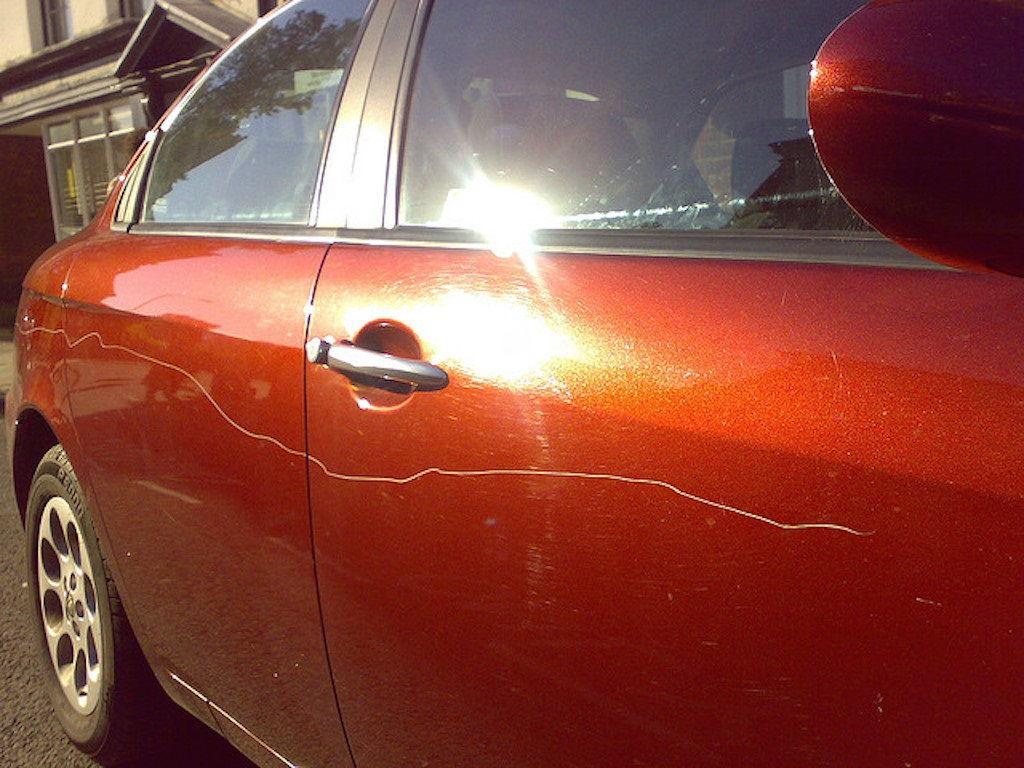

'Minor Damage'

In [5]:
# Display image 
car_image = 'car_damaged_status1.jpg'
display(Image(filename=car_image))

# Make predictions
preds = predict_carDamageSeverity(car_image)

# Check if the car is damaged or not.
label_check[preds[0]]

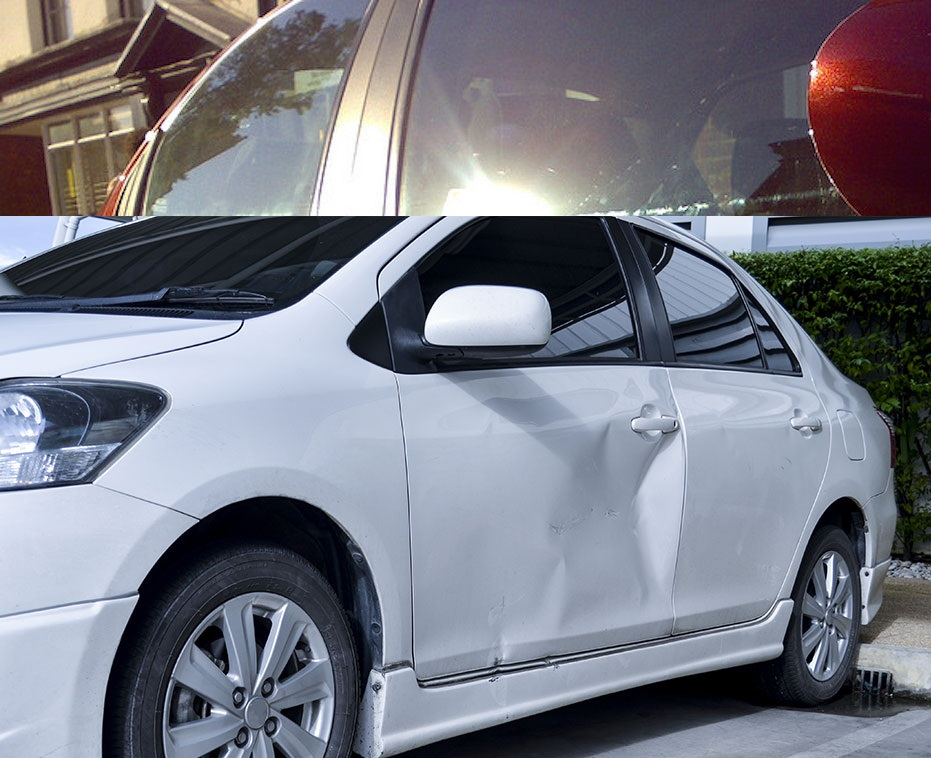

'Moderate Damage'

In [6]:
# Display image 
car_image = 'car_damaged_status2.jpg'
display(Image(filename=car_image))

# Make predictions
preds = predict_carDamageSeverity(car_image)

# Check if the car is damaged or not.
label_check[preds[0]]

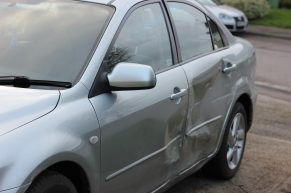

'Moderate Damage'

In [7]:
# Display image 
car_image = 'car_damaged_status3.jpg'
display(Image(filename=car_image))

# Make predictions
preds = predict_carDamageSeverity(car_image)

# Check if the car is damaged or not.
label_check[preds[0]]

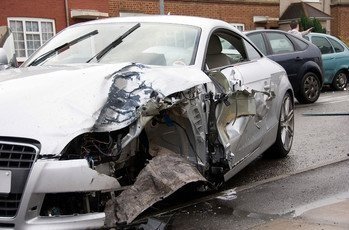

'Severe Damage'

In [8]:
# Display image 
car_image = 'car_damaged_status4.jpg'
display(Image(filename=car_image))

# Make predictions
preds = predict_carDamageSeverity(car_image)

# Check if the car is damaged or not.
label_check[preds[0]]

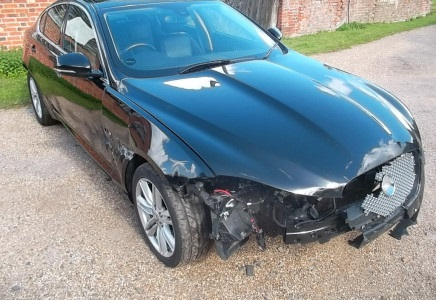

'Severe Damage'

In [9]:
# Display image 
car_image = 'car_damaged_status5.jpg'
display(Image(filename=car_image))

# Make predictions
preds = predict_carDamageSeverity(car_image)

# Check if the car is damaged or not.
label_check[preds[0]]